In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
datasetLocation = "Datasets/processedHouse_Price.csv"
# datasetLocation = 'https://raw.githubusercontent.com/mbharti321/dataBank/main/Udemy/House_Price.csv'
df = pd.read_csv(datasetLocation, header=0)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [7]:
df.shape

(506, 16)

# Simple linear regression

- `y = B1 + B0*X`

In [8]:
import statsmodels.api as sn

In [12]:
#adding B1 into X variable following the formula `y = B1 + B0*X`
x = sn.add_constant(df.room_num)

In [13]:
y = df.price

In [18]:
# ols: ordinary least square
lm = sn.OLS(y, x).fit()

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           1.31e-74
Time:                        22:48:18   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using `sklearn` library

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
y = df.price

In [30]:
# x will be two dimentional array, why?
x = df[['room_num']]

In [31]:
# craeting Linear regression object
lm2 = LinearRegression()

In [32]:
# fitting the model with x, y data
lm2.fit(x,y)

LinearRegression()

In [33]:
# printing B0 and B1(i.e. intecept, slope)
print(lm2.intercept_, lm2.coef_)

-34.65924312309724 [9.09966966]


In [34]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [35]:
lm2.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [36]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

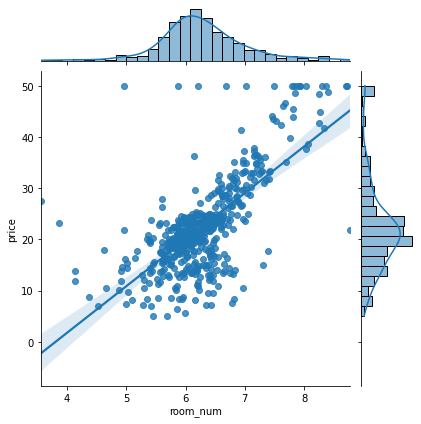

In [37]:
sns.jointplot(x = df.room_num, y= df.price, data = df, kind  ='reg')